In [1]:
import torch
from torch.linalg import solve
t = torch.tensor

# Problem Formulation

In [2]:
def A(p):
    return p.reshape((2, 2))

def b(p):
    return p[2:]

def x(p):
    return solve(A(p), b(p))

In [3]:
p0 = t([1.0, 2.0, 3.0, 4.0])

In [4]:
A(p0)

tensor([[1., 2.],
        [3., 4.]])

In [5]:
b(p0)

tensor([3., 4.])

In [6]:
x(p0)

tensor([-2.0000,  2.5000])

# Optimize Using Backpropagation

In [7]:
from torch.optim import SGD
from torch import nn

In [8]:
x_star = t([5.0, 6.0])

In [9]:
def error(p):
    return torch.norm(x(p) - x_star)

In [10]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.p = nn.Parameter(p0.clone(), requires_grad=True)

    def error(self):
        return error(self.p)

In [11]:
model = Model()
optim = torch.optim.Adam(model.parameters(), lr=0.1)

In [12]:
n_iters = 100
ps = []
for i in range(0, n_iters):
    ps.append(model.p.clone().detach())
    loss = model.error()
    loss.backward()
    optim.step()
    optim.zero_grad()

# Inspect Results

In [13]:
import matplotlib.pyplot as plt
import numpy

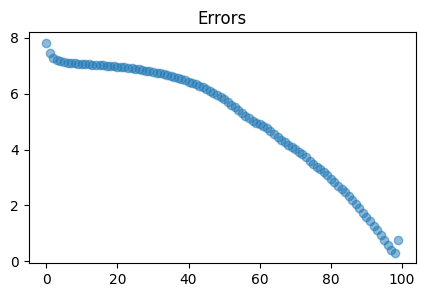

In [14]:
def scatter(ys, title: str):
    plt.figure(figsize=(5, 3))
    plt.scatter(list(range(len(ys))), ys, alpha=0.5)
    plt.title(title)

scatter(ys=[error(p) for p in ps], title="Errors")

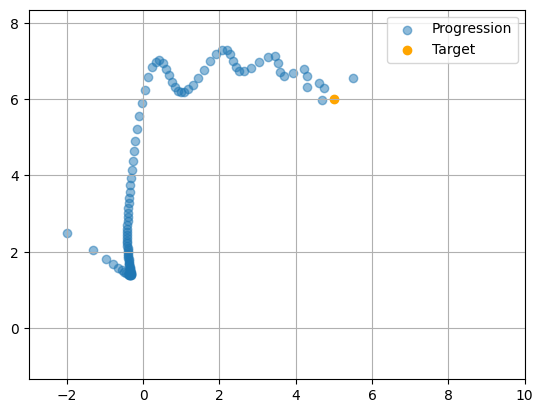

In [15]:
from matplotlib import animation
import numpy as np

fig = plt.figure()
ax = fig.subplots()
ax.axis("equal")
ax.grid()
ax.set_xlim((-3, 10))
ax.set_ylim((-3, 10))
scat = ax.scatter([], [], alpha=0.5, label="Progression")
ax.scatter(*x_star, color="orange", label="Target")
ax.legend()

def drawframe(n: int):
    ps_ = ps[:(n+1)]
    xs = np.array([x(p).numpy() for p in ps_])
    scat.set_offsets(xs)
    return [scat]

anim = animation.FuncAnimation(fig, drawframe, frames=n_iters, interval=50, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video());